First Few Rows of the Dataset:
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  

Dataset Structure and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
None

Summary Statistics for Numeric Columns:

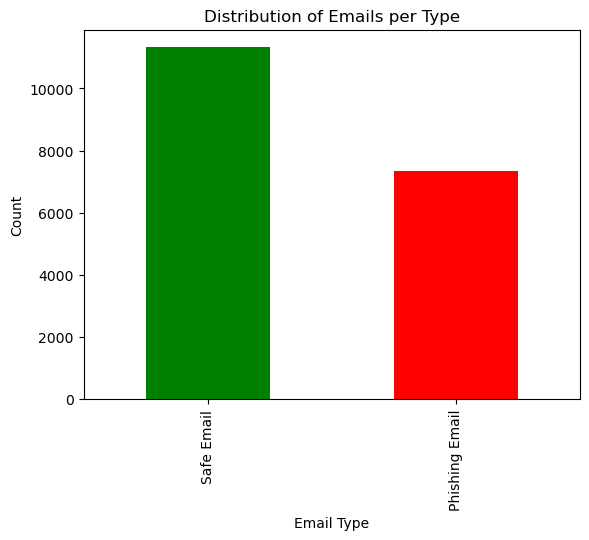

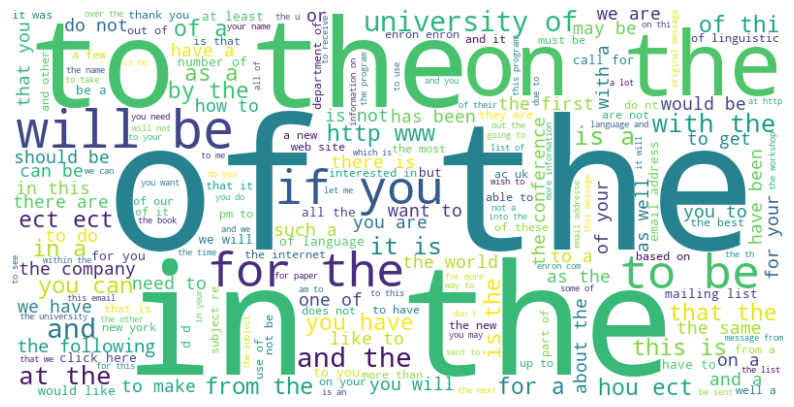

Training naive_bayes model...
naive_bayes - Accuracy: 95.12%, F1 Score: 96.01%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1477
           1       0.95      0.97      0.96      2253

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



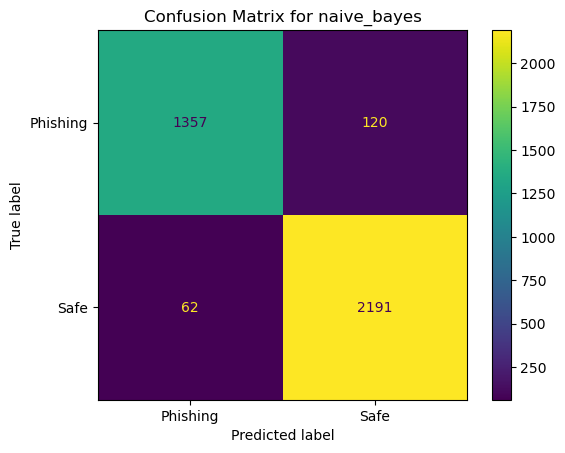

Training logistic_regression model...
logistic_regression - Accuracy: 95.60%, F1 Score: 96.43%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1477
           1       0.95      0.98      0.96      2253

    accuracy                           0.96      3730
   macro avg       0.96      0.95      0.95      3730
weighted avg       0.96      0.96      0.96      3730



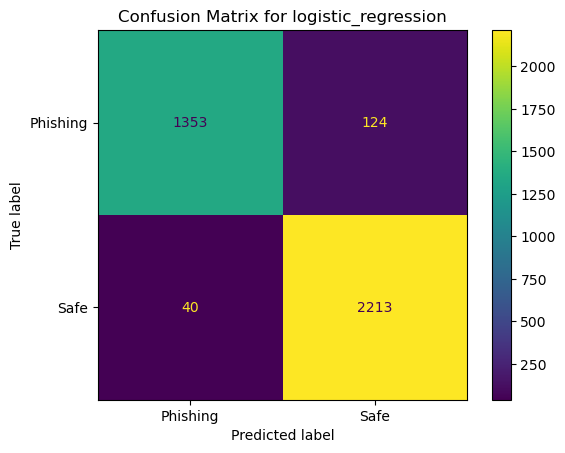

Training sgd_classifier model...
sgd_classifier - Accuracy: 97.00%, F1 Score: 97.49%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1477
           1       0.99      0.96      0.97      2253

    accuracy                           0.97      3730
   macro avg       0.97      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



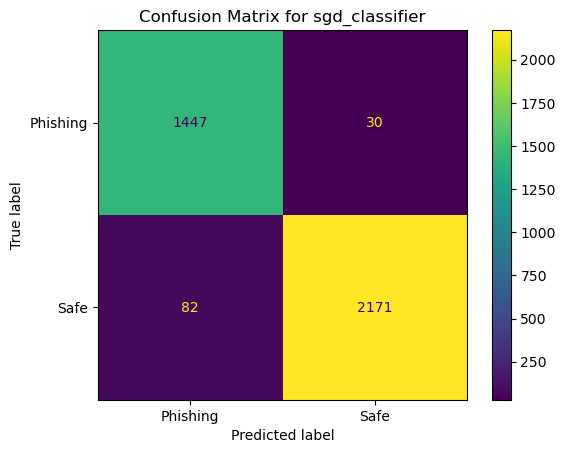

Training xgboost model...
xgboost - Accuracy: 95.66%, F1 Score: 96.34%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1477
           1       0.98      0.95      0.96      2253

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



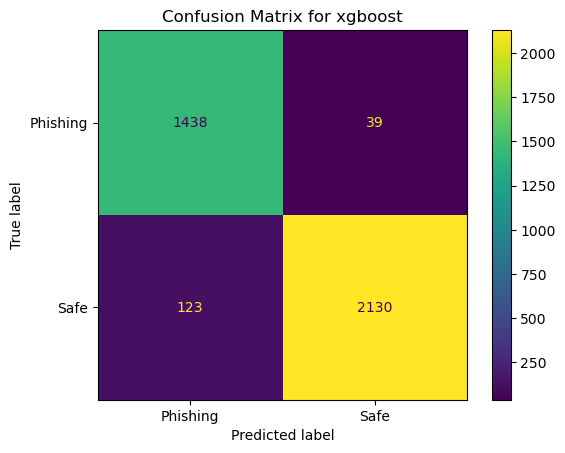

Training decision_tree model...
decision_tree - Accuracy: 91.45%, F1 Score: 92.76%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1477
           1       0.95      0.91      0.93      2253

    accuracy                           0.91      3730
   macro avg       0.91      0.92      0.91      3730
weighted avg       0.92      0.91      0.91      3730



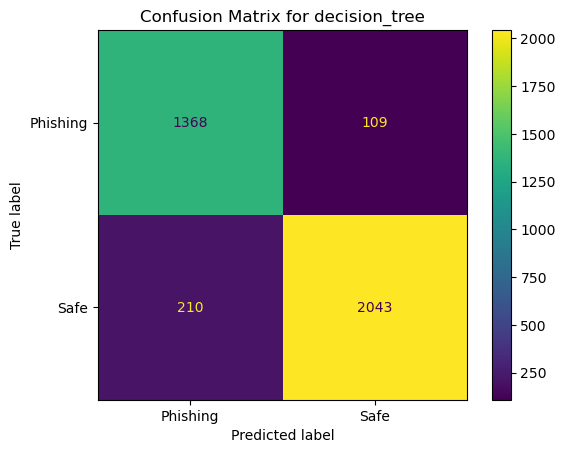

Training random_forest model...
random_forest - Accuracy: 96.06%, F1 Score: 96.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1477
           1       0.98      0.96      0.97      2253

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



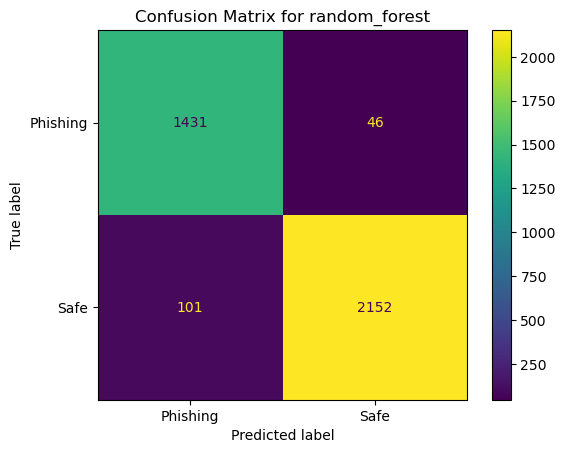

Training mlp model...
mlp - Accuracy: 97.05%, F1 Score: 97.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1477
           1       0.99      0.96      0.98      2253

    accuracy                           0.97      3730
   macro avg       0.97      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



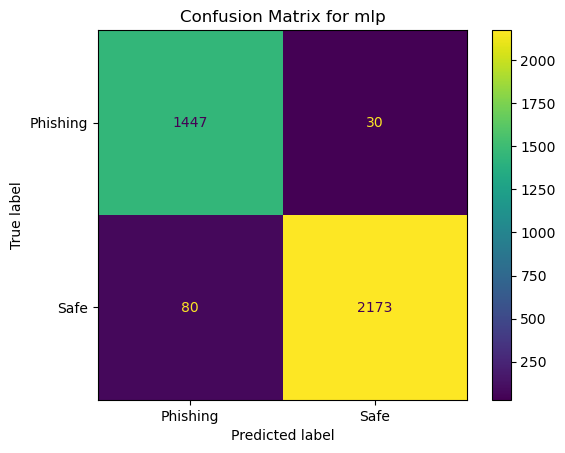

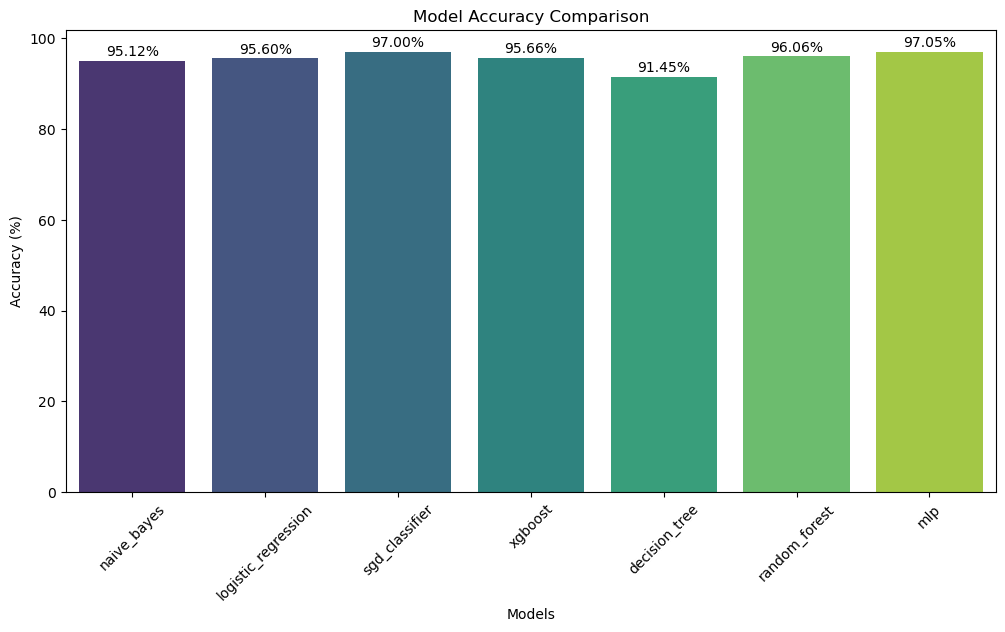

All models have been trained and saved.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import joblib
import warnings
import re
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv(r'C:/Users/Tharuka/Desktop/Horizontal App/Email Dataset/Phishing_Email.csv')

# Inspect the first few rows
print("First Few Rows of the Dataset:")
print(df.head())

# Check the structure and data types
print("\nDataset Structure and Data Types:")
print(df.info())

# Summary statistics for numeric columns (if any)
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

# Check for missing values
print("\nChecking for Missing Values:")
print(df.isnull().sum())

# Distribution of URLs per Type
print("\nDistribution of Emails per Type:")
print(df['Email Type'].value_counts())

# Visualize the distribution
df['Email Type'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Emails per Type')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Convert categorical labels into numerical
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type'])  # 0 denotes phishing and 1 denotes safe

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text

# Apply preprocessing
df['Email Text'] = df['Email Text'].astype(str).apply(preprocess_text)

# Visualization: WordCloud
all_mails = " ".join(df['Email Text'])
word_cloud = WordCloud(stopwords="english", width=800, height=400, background_color='white').generate(all_mails)
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['Email Text'], df['Email Type'], test_size=0.2, random_state=0)

# Define pipelines
pipelines = {
    'naive_bayes': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', MultinomialNB())
    ]),
    'logistic_regression': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classifier': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', SGDClassifier())
    ]),
    'xgboost': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', XGBClassifier())
    ]),
    'decision_tree': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', RandomForestClassifier())
    ]),
    'mlp': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
        ('classifier', MLPClassifier())
    ])
}

# Train and evaluate models
results = {}
for name, pipeline in pipelines.items():
    print(f"Training {name} model...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'f1_score': f1}
    print(f"{name} - Accuracy: {accuracy * 100:.2f}%, F1 Score: {f1 * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Phishing', 'Safe']).plot()
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    # Save the model
    joblib.dump(pipeline, f'{name}_pipeline.pkl')

# Compare model performance
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] * 100 for name in model_names]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

print("All models have been trained and saved.")
